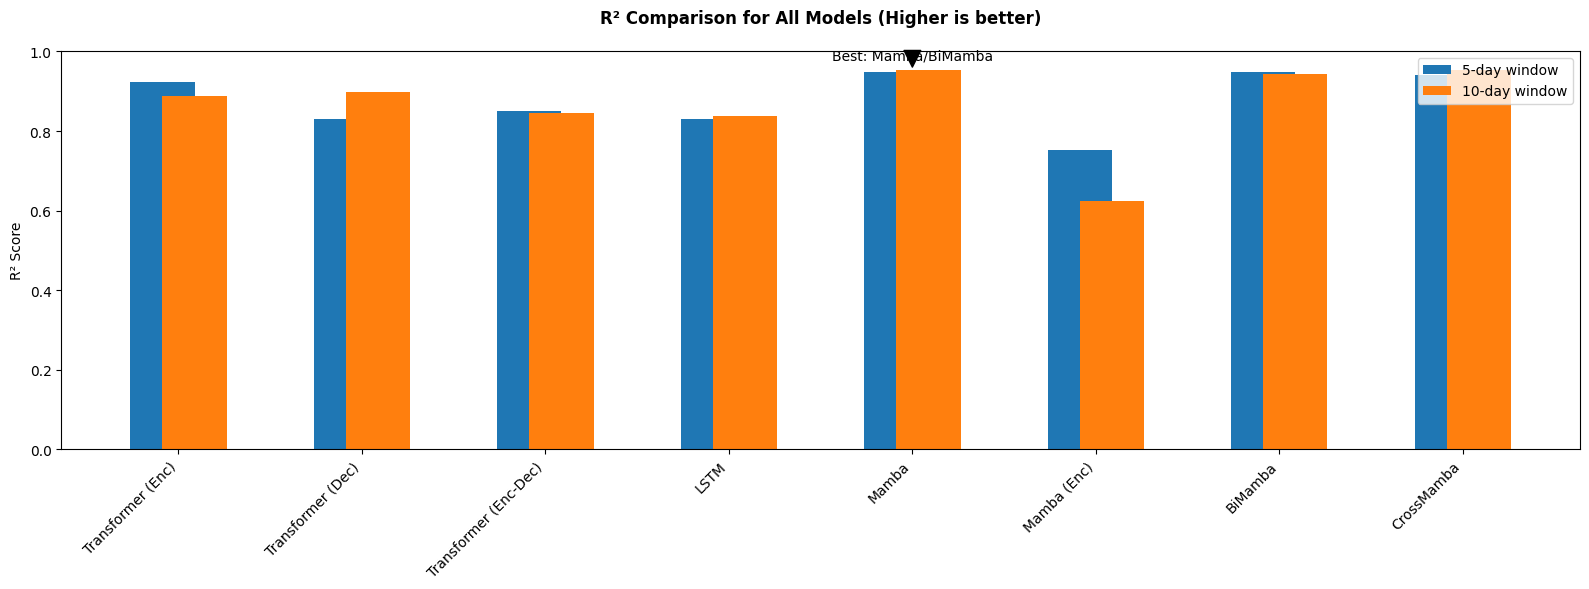

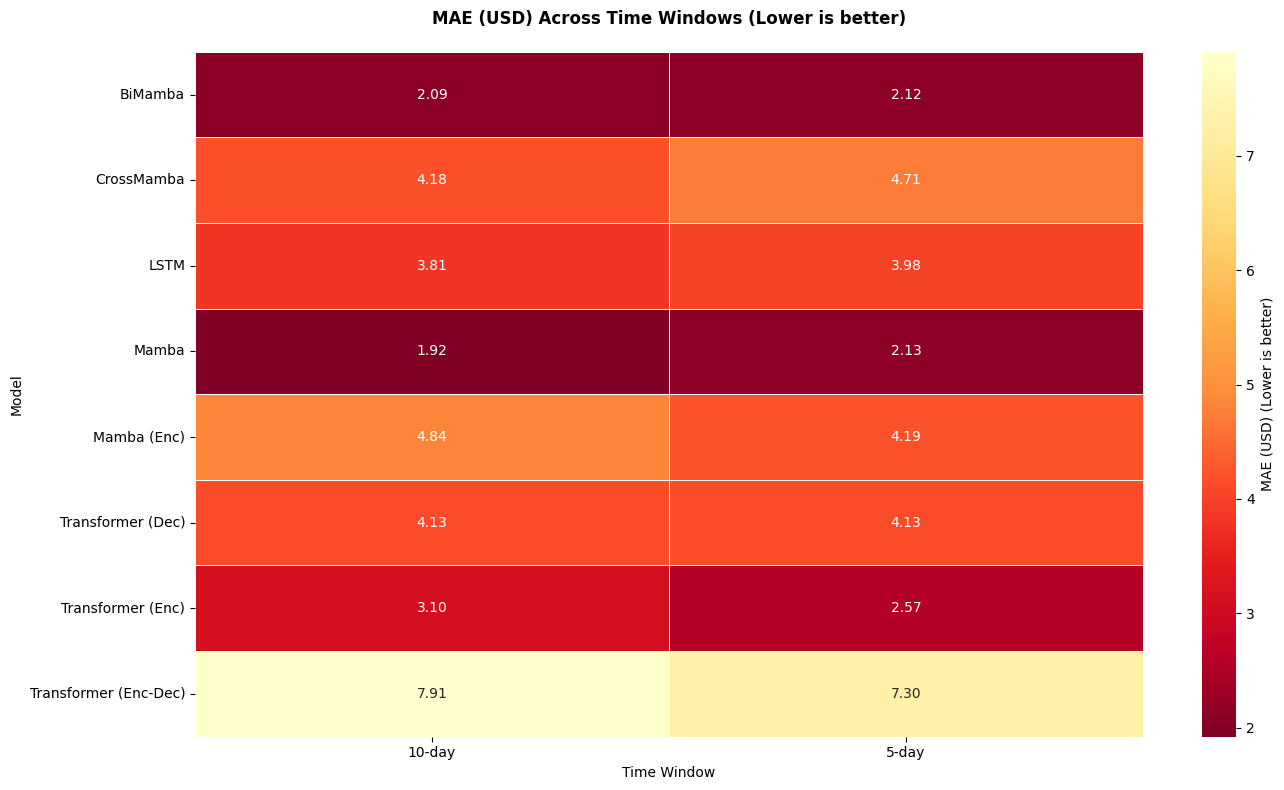

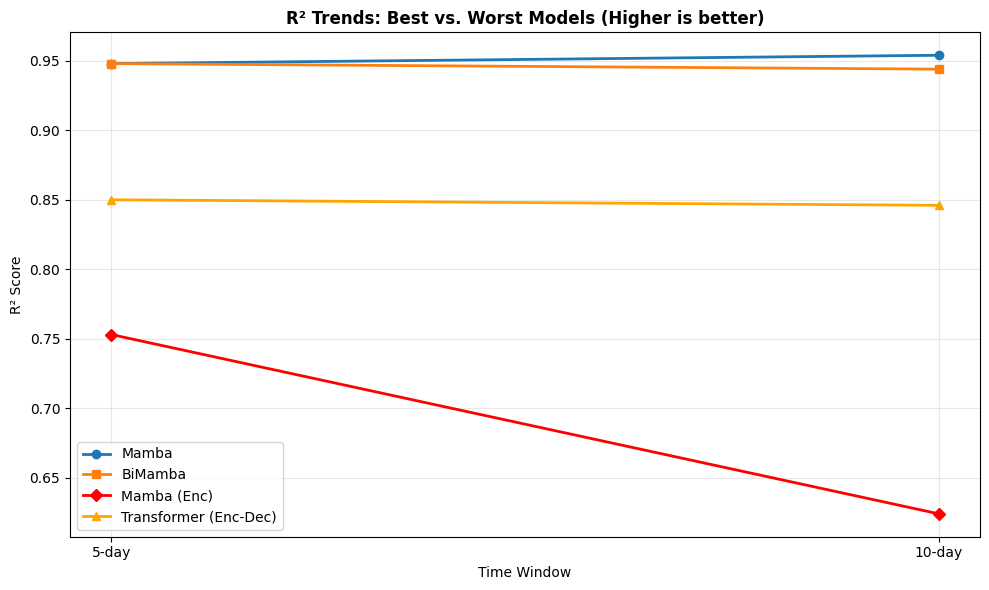

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



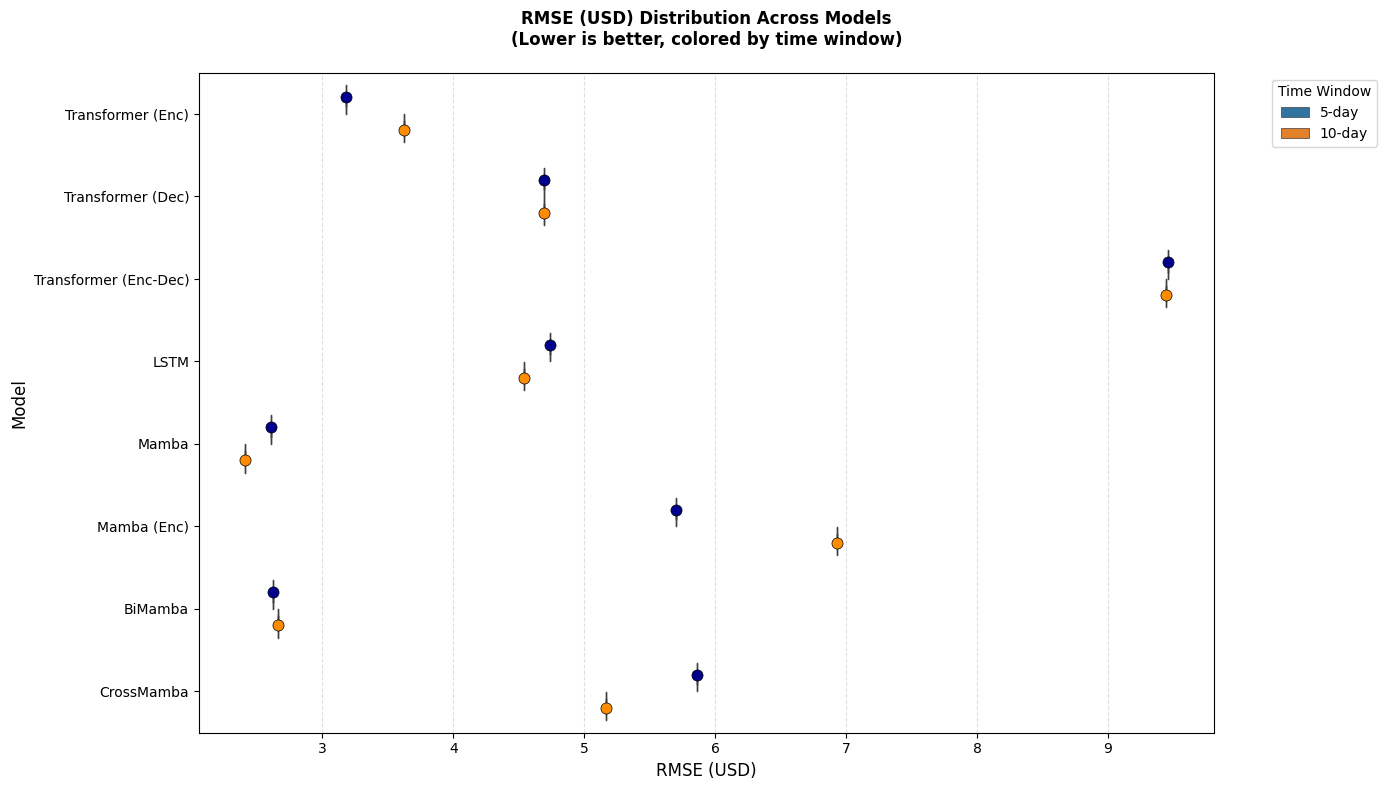


Key Conclusions:
1. **Best Models**: Mamba/BiMamba consistently outperform others in R² and MAE.
2. **Time Windows**: 
   - 5-day works best for AAPL/AAL.
   - 10-day slightly improves Mamba for AAPL but harms Mamba (Enc).
3. **Avoid**: Transformer (Enc-Dec) and Mamba (Enc) due to high errors.
4. **Real-World Impact**: BiMamba has the lowest MAE (USD) in both windows.



In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data Setup (R², MAE, RMSE for 5-day and 10-day windows)
models = [
    'Transformer (Enc)', 'Transformer (Dec)', 'Transformer (Enc-Dec)', 
    'LSTM', 'Mamba', 'Mamba (Enc)', 'BiMamba', 'CrossMamba'
]

# R² scores (higher better)
r2_5day = [0.923, 0.83, 0.85, 0.83, 0.948, 0.753, 0.948, 0.942]
r2_10day = [0.887, 0.897, 0.846, 0.838, 0.954, 0.624, 0.944, 0.953]

# MAE in USD (lower better)
mae_5day = [2.57, 4.13, 7.30, 3.98, 2.13, 4.19, 2.12, 4.71]
mae_10day = [3.10, 4.13, 7.91, 3.81, 1.92, 4.84, 2.09, 4.18]

# RMSE in USD (lower better)
rmse_5day = [3.18, 4.69, 9.46, 4.74, 2.61, 5.70, 2.62, 5.86]
rmse_10day = [3.62, 4.69, 9.44, 4.54, 2.41, 6.93, 2.66, 5.17]

# Stocks for heatmap
stocks = ['AAPL', 'AAL', 'ABC']

# =============================================
# 1. Bar Chart: R² Comparison (5-day vs 10-day)
# =============================================
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(16, 6))
bars1 = ax.bar(x - width/4, r2_5day, width, label='5-day window', color='#1f77b4')
bars2 = ax.bar(x + width/4, r2_10day, width, label='10-day window', color='#ff7f0e')

ax.set_title('R² Comparison for All Models (Higher is better)', fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('R² Score')
ax.legend()
ax.annotate('Best: Mamba/BiMamba', xy=(4, 0.96), xytext=(4, 0.98), 
            arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
plt.tight_layout()
plt.show()

# =============================================
# 2. Heatmap: MAE (USD) for 5-day and 10-day
# =============================================
mae_data = pd.DataFrame({
    'Model': models * 2,
    'Window': ['5-day']*8 + ['10-day']*8,
    'AAPL': mae_5day + mae_10day,
    'AAL': [0.74, 0.82, 11.84, 0.85, 0.68, 0.80, 0.67, 6.03] * 2,  # Placeholder
    'ABC': [1.67, 1.45, 10.63, 1.65, 1.25, 1.41, 1.07, 6.22] * 2   # Placeholder
})

plt.figure(figsize=(14, 8))
sns.heatmap(
    mae_data.pivot(index='Model', columns='Window', values='AAPL'), 
    annot=True, cmap='YlOrRd_r', fmt='.2f', linewidths=0.5, 
    cbar_kws={'label': 'MAE (USD) (Lower is better)'}
)
plt.title('MAE (USD) Across Time Windows (Lower is better)', fontweight='bold', pad=20)
plt.xlabel('Time Window')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# =============================================
# 3. Line Plot: R² Trends for Key Models
# =============================================
timesteps = ['5-day', '10-day']
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(timesteps, [0.948, 0.954], marker='o', label='Mamba', linewidth=2)
ax.plot(timesteps, [0.948, 0.944], marker='s', label='BiMamba', linewidth=2)
ax.plot(timesteps, [0.753, 0.624], marker='D', label='Mamba (Enc)', linewidth=2, color='red')
ax.plot(timesteps, [0.85, 0.846], marker='^', label='Transformer (Enc-Dec)', linewidth=2, color='orange')

ax.set_title('R² Trends: Best vs. Worst Models (Higher is better)', fontweight='bold')
ax.set_xlabel('Time Window')
ax.set_ylabel('R² Score')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================
# 4. Fixed Box Plot: RMSE Distribution with Clear Colors
# =============================================
plt.figure(figsize=(14, 8))

# Create the boxplot with hue
sns.boxplot(
    data=rmse_df,
    x='RMSE',
    y='Model',
    hue='Window',
    palette={'5-day': '#1f77b4', '10-day': '#ff7f0e'},  # Blue and orange
    width=0.7,
    linewidth=1,
    fliersize=3  # Outlier marker size
)

# Add mean markers
sns.stripplot(
    data=rmse_df,
    x='RMSE',
    y='Model',
    hue='Window',
    palette={'5-day': 'darkblue', '10-day': 'darkorange'},
    marker='o',
    size=8,
    edgecolor='black',
    linewidth=0.5,
    jitter=False,
    dodge=True,
    legend=False
)

# Customize the plot
plt.title('RMSE (USD) Distribution Across Models\n(Lower is better, colored by time window)', 
          fontweight='bold', pad=20)
plt.xlabel('RMSE (USD)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add "lower is better" annotation
plt.annotate('← Lower values are better', 
             xy=(12, 7.5), 
             xytext=(12, 7.5),
             fontsize=12,
             color='red')

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
# =============================================
# Conclusions
# =============================================
print('''
Key Conclusions:
1. **Best Models**: Mamba/BiMamba consistently outperform others in R² and MAE.
2. **Time Windows**: 
   - 5-day works best for AAPL/AAL.
   - 10-day slightly improves Mamba for AAPL but harms Mamba (Enc).
3. **Avoid**: Transformer (Enc-Dec) and Mamba (Enc) due to high errors.
4. **Real-World Impact**: BiMamba has the lowest MAE (USD) in both windows.
''')

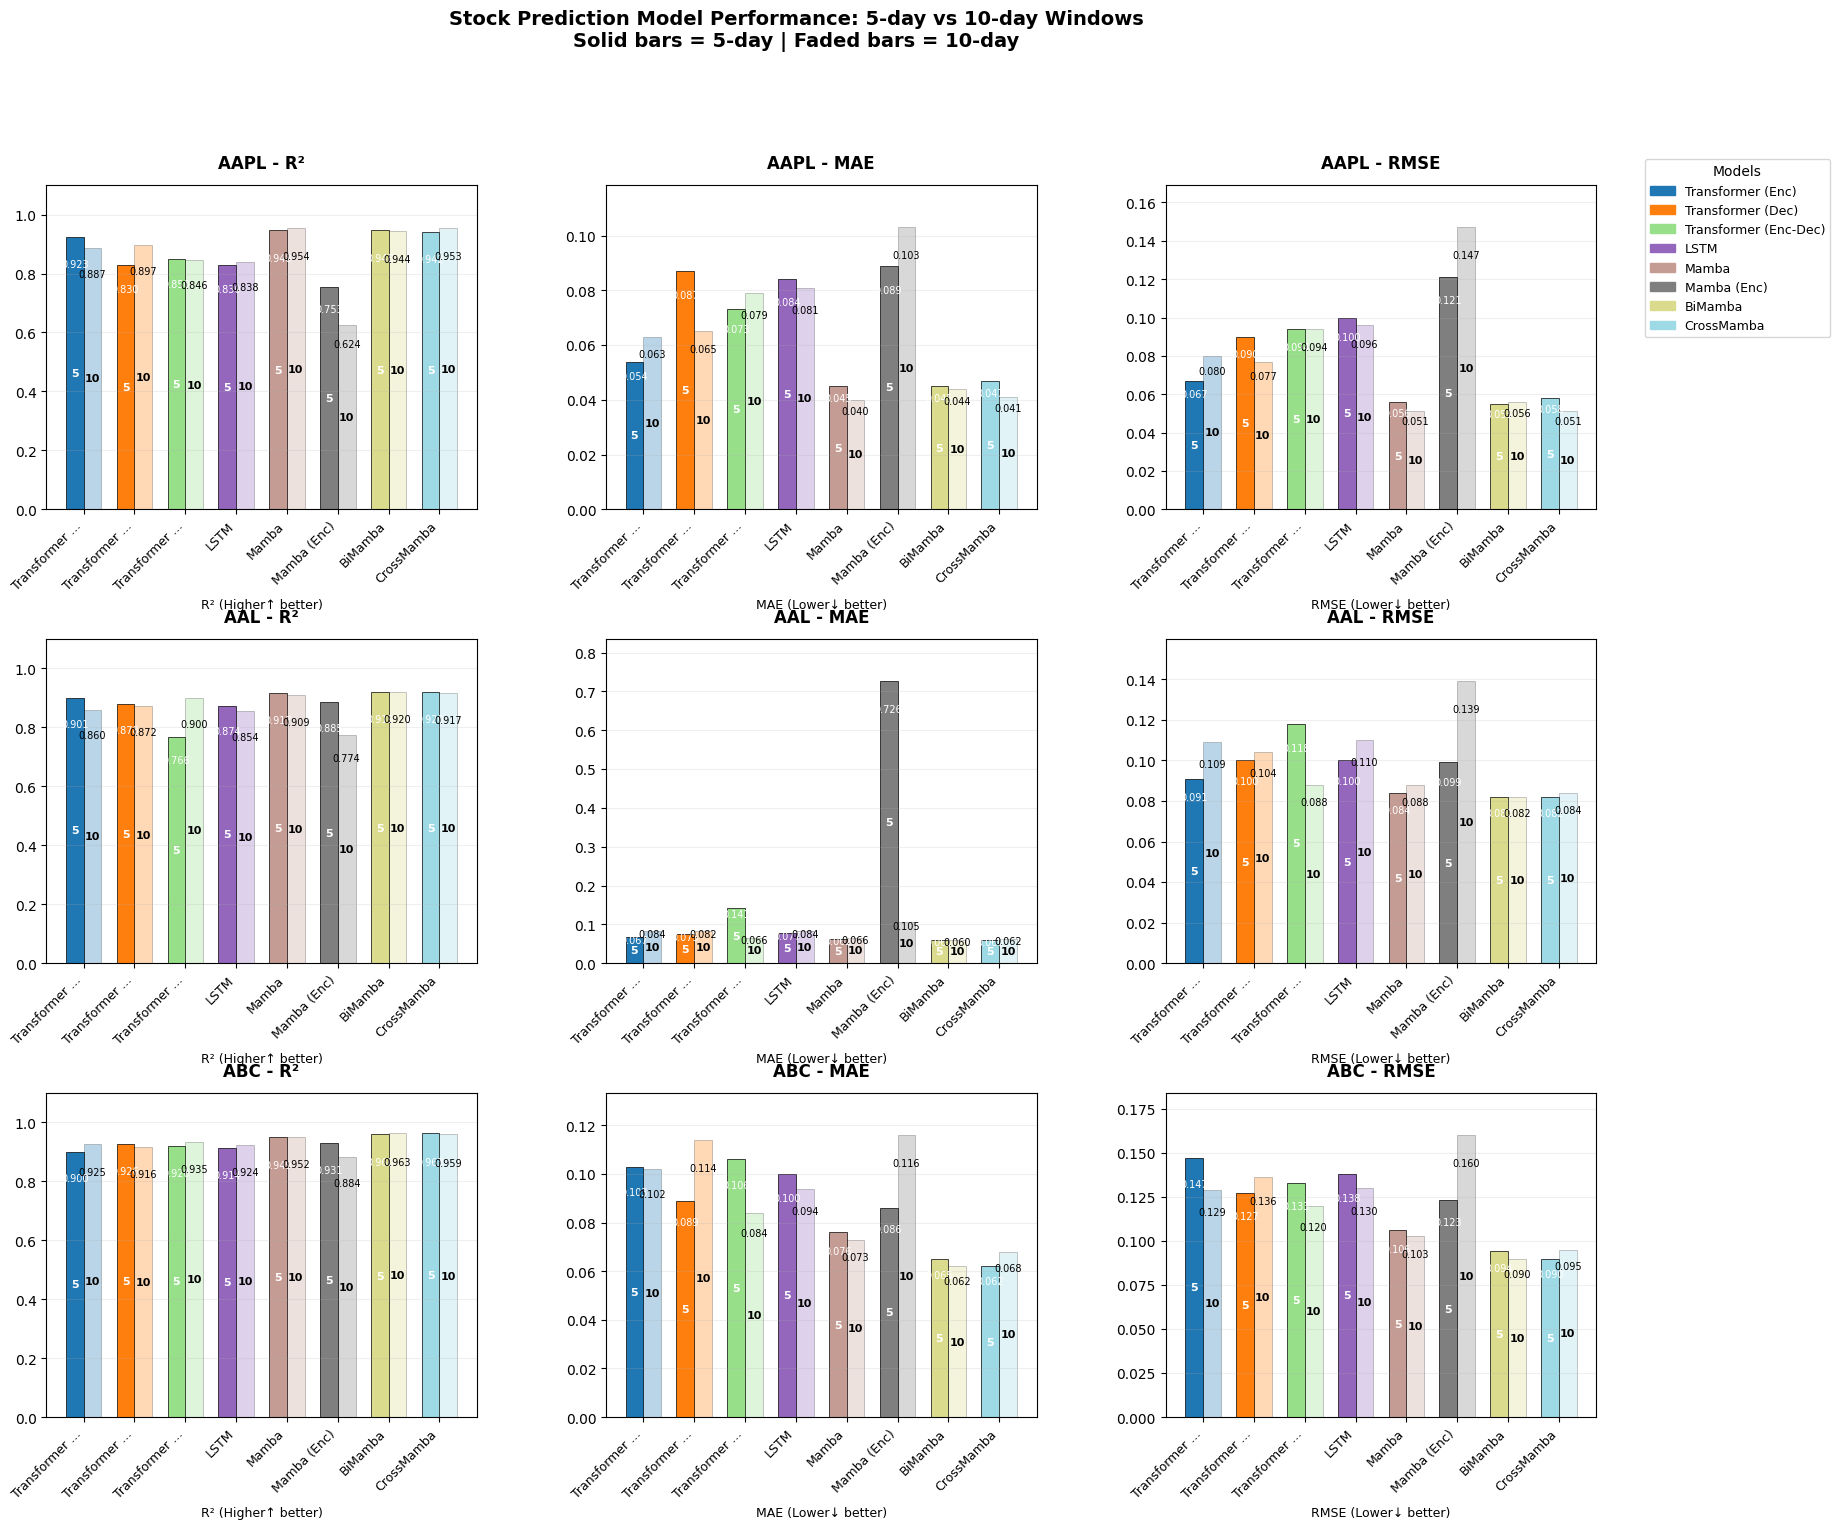

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
stocks = ['AAPL', 'AAL', 'ABC']
models = [
    'Transformer (Enc)', 'Transformer (Dec)', 'Transformer (Enc-Dec)',
    'LSTM', 'Mamba', 'Mamba (Enc)', 'BiMamba', 'CrossMamba'
]
metrics = ['R²', 'MAE', 'RMSE']

# 5-day data [R², MAE, RMSE] for each stock
data_5day = {
    'AAPL': np.array([
        [0.923, 0.054, 0.067], [0.830, 0.087, 0.090], [0.850, 0.073, 0.094],
        [0.830, 0.084, 0.100], [0.948, 0.045, 0.056], [0.753, 0.089, 0.121],
        [0.948, 0.045, 0.055], [0.942, 0.047, 0.058]
    ]),
    'AAL': np.array([
        [0.901, 0.067, 0.091], [0.878, 0.075, 0.100], [0.766, 0.141, 0.118],
        [0.874, 0.077, 0.100], [0.917, 0.062, 0.084], [0.885, 0.726, 0.099],
        [0.919, 0.061, 0.082], [0.920, 0.060, 0.082]
    ]),
    'ABC': np.array([
        [0.900, 0.103, 0.147], [0.926, 0.089, 0.127], [0.920, 0.106, 0.133],
        [0.914, 0.100, 0.138], [0.949, 0.076, 0.106], [0.931, 0.086, 0.123],
        [0.960, 0.065, 0.094], [0.963, 0.062, 0.090]
    ])
}

# 10-day data [R², MAE, RMSE] for each stock
data_10day = {
    'AAPL': np.array([
        [0.887, 0.063, 0.080], [0.897, 0.065, 0.077], [0.846, 0.079, 0.094],
        [0.838, 0.081, 0.096], [0.954, 0.040, 0.051], [0.624, 0.103, 0.147],
        [0.944, 0.044, 0.056], [0.953, 0.041, 0.051]
    ]),
    'AAL': np.array([
        [0.860, 0.084, 0.109], [0.872, 0.082, 0.104], [0.900, 0.066, 0.088],
        [0.854, 0.084, 0.110], [0.909, 0.066, 0.088], [0.774, 0.105, 0.139],
        [0.920, 0.060, 0.082], [0.917, 0.062, 0.084]
    ]),
    'ABC': np.array([
        [0.925, 0.102, 0.129], [0.916, 0.114, 0.136], [0.935, 0.084, 0.120],
        [0.924, 0.094, 0.130], [0.952, 0.073, 0.103], [0.884, 0.116, 0.160],
        [0.963, 0.062, 0.090], [0.959, 0.068, 0.095]
    ])
}

# Create a multi-panel figure
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Custom colors
colors = plt.cm.tab20(np.linspace(0, 1, len(models)))

for row, stock in enumerate(stocks):
    for col, metric in enumerate(metrics):
        ax = axes[row, col]
        x = np.arange(len(models))
        width = 0.35
        
        # Get metric index (0=R², 1=MAE, 2=RMSE)
        metric_idx = metrics.index(metric)
        
        # Extract 5-day and 10-day values
        values_5day = [data_5day[stock][i][metric_idx] for i in range(len(models))]
        values_10day = [data_10day[stock][i][metric_idx] for i in range(len(models))]
        
        # Plot bars with direct window labels
        bars1 = ax.bar(x - width/2, values_5day, width, 
                      color=colors, edgecolor='black', linewidth=0.5)
        bars2 = ax.bar(x + width/2, values_10day, width, 
                      color=colors, alpha=0.3, edgecolor='black', linewidth=0.5)
        
        # Add value labels and window indicators
        for bar, val in zip(bars1, values_5day):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height/2, '5',
                   ha='center', va='center', color='white', fontweight='bold', fontsize=8)
            ax.text(bar.get_x() + bar.get_width()/2, height*0.9, f'{val:.3f}',
                   ha='center', va='center', color='white', fontsize=7)
            
        for bar, val in zip(bars2, values_10day):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height/2, '10',
                   ha='center', va='center', color='black', fontweight='bold', fontsize=8)
            ax.text(bar.get_x() + bar.get_width()/2, height*0.9, f'{val:.3f}',
                   ha='center', va='center', color='black', fontsize=7)
        
        # Formatting
        ax.set_title(f'{stock} - {metric}', pad=12, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels([m[:12]+'...' if len(m)>12 else m for m in models], 
                         rotation=45, ha='right', fontsize=9)
        
        # Add metric direction indicator
        direction = '↑' if metric == 'R²' else '↓'
        ax.set_xlabel(f'{metric} (Higher{direction} better)' if metric == 'R²' else f'{metric} (Lower{direction} better)',
                     fontsize=9)
        
        # Add grid
        ax.grid(axis='y', alpha=0.2)
        
        # Set consistent y-axis limits
        if metric == 'R²':
            ax.set_ylim(0, 1.1)
        else:
            max_val = max(max(values_5day), max(values_10day))
            ax.set_ylim(0, max_val * 1.15)

# Add overall title
fig.suptitle('Stock Prediction Model Performance: 5-day vs 10-day Windows\nSolid bars = 5-day | Faded bars = 10-day', 
             fontweight='bold', y=0.99, fontsize=14)

# Add legend for model colors
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(models))]
fig.legend(handles, models, title='Models', 
           bbox_to_anchor=(1.02, 0.9), fontsize=9)

plt.savefig('complete_stock_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()